<a href="https://colab.research.google.com/github/brayanb1701/Fisica3_Lab4/blob/main/Lab_4_Lab_Fisica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm, colors
import os
from scipy.optimize import curve_fit,fsolve, fmin, minimize_scalar
from sklearn.metrics import r2_score, mean_squared_error

#Ley de Malus

In [46]:
data_malus = pd.read_excel("Datos_Lab_4.xlsx", 'Fase 2')
data_malus

,Angulo,Angulo_rad,V1,V2,V_prom
0,0,0.000000,0.10,0.10,0.10
1,30,0.523599,0.80,0.82,0.81
2,60,1.047198,4.30,4.10,4.20
3,90,1.570796,5.10,5.00,5.05
4,120,2.094395,4.00,4.30,4.15
5,150,2.617994,0.80,0.80,0.80
6,180,3.141593,0.10,0.10,0.10
7,210,3.665191,0.90,0.80,0.85
8,240,4.188790,4.10,3.90,4.00
9,270,4.712389,5.10,4.90,5.00


In [47]:
angles = data_malus['Angulo_rad']
V_prom = data_malus['V_prom']

Text(0, 0.5, '$Voltaje$ $[V]$')

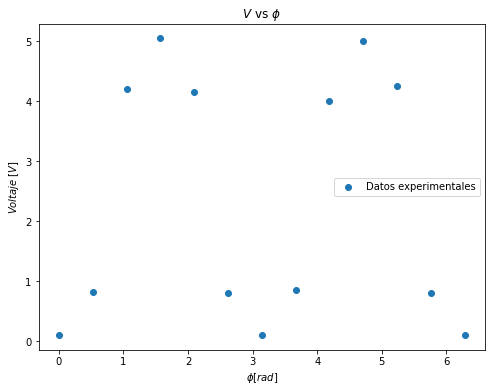

In [48]:
plt.figure(figsize=[8,6])
plt.scatter(angles,V_prom, label='Datos experimentales')
plt.legend()
plt.title('$V$ vs $\phi$')
plt.xlabel('$\phi [rad]$')
plt.ylabel('$Voltaje$ $[V]$')

In [49]:
def malus(phi, v0,d):
    return v0*np.cos(phi+d)**2
coef1, pcov1 = curve_fit(malus, angles, V_prom)
R_S1 = r2_score(V_prom,malus(angles, *coef1))
RMSE1 = mean_squared_error(V_prom,malus(angles, *coef1), squared=False)
print("R^2 y RMSE para 1: "+str(R_S1)+" "+str(RMSE1))
print("V0="+str(coef1[0]))
print("delta="+str(coef1[1]*180/np.pi))

R^2 y RMSE para 1: 0.9746463759191455 0.3181890192770103
V0=5.181160846460701
delta=89.78845698007248


Text(0, 0.5, '$Voltaje$ $[V]$')

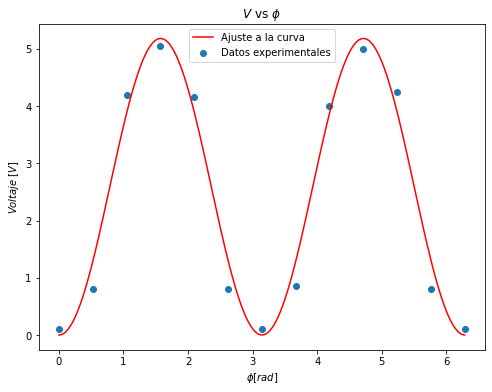

In [50]:
plt.figure(figsize=[8,6])
plt.scatter(angles,V_prom, label='Datos experimentales')
angles2=np.linspace(0,2*np.pi,1000)
plt.plot(angles2,malus(angles2, *coef1), c='red', label='Ajuste a la curva')
plt.legend()
plt.title('$V$ vs $\phi$')
plt.xlabel('$\phi [rad]$')
plt.ylabel('$Voltaje$ $[V]$')

#Punto 3

In [89]:
data_p3 = pd.read_excel("Datos_Lab_4.xlsx", 'Punto 3')
print(data_p3)
p3_x = data_p3['x']
p3_V = data_p3['V_norm']

   y    x     V    V_norm
0  0  0.1  10.3  1.000000
1  0  0.2   6.6  0.640777
2  0  0.3   5.5  0.533981
3  0  0.4   3.3  0.320388


Text(0, 0.5, '$Voltaje$ $[V]$')

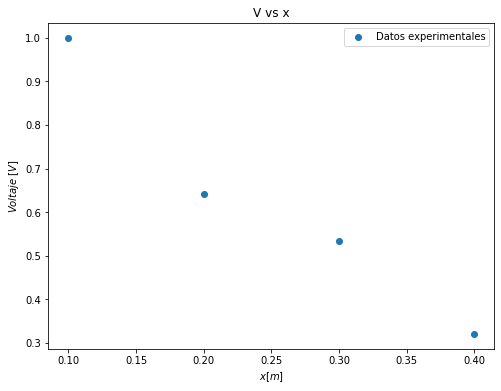

In [90]:
plt.figure(figsize=[8,6])
plt.scatter(p3_x,p3_V, label='Datos experimentales')
plt.legend()
plt.title('V vs x')
plt.xlabel('$x [m]$')
plt.ylabel('$Voltaje$ $[V]$')


In [91]:
def f_r2(r, c):
    return c/r**2
def f_r(r, c):
    return c/r

coef1, pcov1 = curve_fit(f_r, p3_x, p3_V)
R_S1 = r2_score(p3_V,f_r(p3_x, *coef1))
RMSE1 = mean_squared_error(p3_V,f_r(p3_x, *coef1), squared=False)
print("R^2 y RMSE para 1: "+str(R_S1)+" "+str(RMSE1))
print("C="+str(coef1[0]))

coef2, pcov2 = curve_fit(f_r2, p3_x, p3_V)
R_S2 = r2_score(p3_V,f_r2(p3_x, *coef2))
RMSE2 = mean_squared_error(p3_V,f_r2(p3_x, *coef2), squared=False)
print("R^2 y RMSE para 2: "+str(R_S2)+" "+str(RMSE2))
print("C="+str(coef2[0]))

R^2 y RMSE para 1: 0.8008414360952805 0.1097549352753129
C=0.11087852240332066
R^2 y RMSE para 2: -0.5460933693565664 0.3058034803397376
C=0.011490590143136581


Text(0, 0.5, '$Voltaje$ $[V]$')

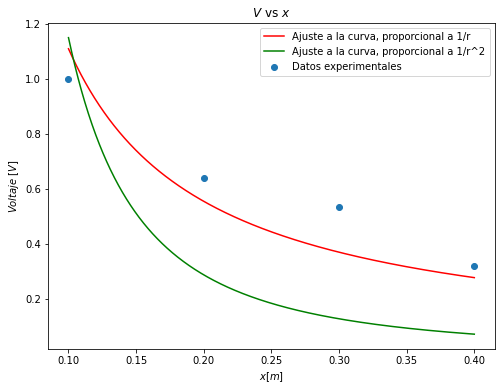

In [92]:
plt.figure(figsize=[8,6])
p3_x2 = np.linspace(0.1,0.4,1000)
plt.scatter(p3_x,p3_V, label='Datos experimentales')
plt.plot(p3_x2,f_r(p3_x2, *coef1), c='red', label='Ajuste a la curva, proporcional a 1/r')
plt.plot(p3_x2,f_r2(p3_x2, *coef2), c='green', label='Ajuste a la curva, proporcional a 1/r^2')
plt.legend()
plt.title('$V$ vs $x$')
plt.xlabel('$x [m]$')
plt.ylabel('$Voltaje$ $[V]$')

In [83]:
data_p2 = pd.read_excel("Datos_Lab_4.xlsx", 'Punto 2')
p2_x = data_p2['x']*1e-2
p2_y = data_p2['y']*1e-2
p2_V = data_p2['V']

r = np.sqrt(np.power(p2_x,2)+np.power(p2_y,2))
theta = np.arctan(p2_y/p2_x)

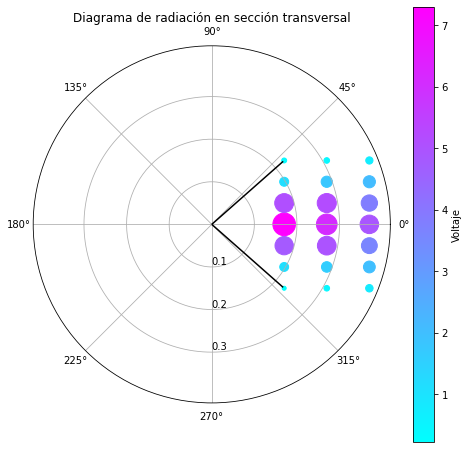

In [87]:
N = 100
area = 70 * p2_V
colores = np.array(p2_V)
ang_tot = theta[0]
r_tot = np.sqrt(0.1**2+0.2**2)
fig, axs = plt.subplots(1,1, subplot_kw=dict(projection='polar'), figsize=[8,8])
c = axs.scatter(theta, r, c=colores, s=area, cmap='cool', alpha=1, label="Voltajes e")
axs.set_rticks([0.1, 0.20, 0.30])  # Less radial ticks
axs.set_rlabel_position(-90)  # Move radial labels away from plotted line
cbar = plt.colorbar(cm.ScalarMappable(norm=colors.Normalize(vmin=np.min(colores), vmax=np.max(colores)), cmap='cool'), ax=axs)
cbar.set_label('Voltaje')
axs.set_title('Diagrama de radiación en sección transversal')
axs.vlines(ang_tot,0,r_tot, zorder=3)
axs.vlines(-ang_tot,0, r_tot, zorder=3)
axs.grid(True)

In [88]:
print("El angulo total de emisión es de aproximadamente: "+str(2*abs(ang_tot)*180/np.pi)+"°")

El angulo total de emisión es de aproximadamente: 82.8473312500053°
